# Week 7 Lab: Text Analytics

<img align="right" style="padding-right:10px;" src="figures_wk7/topic_modeling.png" width=400><br>

This week's assignment will focus on text analysis of BBC News articles.

## Our Dataset: 
**Dataset:** bbc.csv(Provided in folder assign_wk7)<br>
Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005. <br>
Class Labels: 5 (business, entertainment, politics, sport, tech)

## Text Analytics Lab

**Objective:** 
To demostrate all of the text analysis techniques covered int his week's lecture material. Your submission needs to include the following:
   - Preparation of the text data for analysis
       * Elimination of stopwords, punctuation, digits, lowercase
   - Identify the 10 most frequently used words in the text
       * How about the ten least frequently used words? 
       * How does lemmatization change the most/least frequent words?
           - Explain and demonstrate this topic
   - Generate a world cloud for the text
   - Demonstrate the generation of n-grams and part of speech tagging
   - Create a Topic model of the text
       * Find the optimal number of topics
       * test the accuracy of your model
       * Display your results 2 different ways.
           1) Print the topics and explain any insights at this point.
           2) Graph the topics and explain any insights at this point.


### Deliverables:

Upload your notebook's .ipynb file and your topic_model_viz.html page this week.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

Reference:
> Graphic comes from https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set() 

In [2]:
#Importing the dataset

df = pd.read_csv('C:/Users/Asmita Bamma/Downloads/assign_wk7/assign_wk7/bbc.csv')
df.head()

,id,news,type
0,0,UK economy facing 'major risks'\n \n The UK ma...,business
1,1,Aids and climate top Davos agenda\n \n Climate...,business
2,2,Asian quake hits European shares\n \n Shares i...,business
3,3,India power shares jump on debut\n \n Shares i...,business
4,4,Lacroix label bought by US firm\n \n Luxury go...,business


# Basic Text Analysis Metrics

Word Count

In [3]:
df['word_cnt'] = df.news.apply(lambda x: len(str(x).split(" ")))


In [4]:
# Now lets check the values
df.head(10)

,id,news,type,word_cnt
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454
2,2,Asian quake hits European shares\n \n Shares i...,business,553
3,3,India power shares jump on debut\n \n Shares i...,business,175
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269
8,8,WorldCom director admits lying\n \n The former...,business,356
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346


We can see a new column with total word counts of the each news.

Character Count

In [5]:
# Checking the number of characters in each post
df['char_cnt'] = df.news.str.len()

In [6]:
# Lets check the values
df.head(10)

,id,news,type,word_cnt,char_cnt
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675
8,8,WorldCom director admits lying\n \n The former...,business,356,2085
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067


Now, lets calculate the number of stop words by importing NLTK, which is a basic NLP library in python.

In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df.news.apply(lambda x: len([x for x in x.split() if x in stop]))

In [8]:
# Checking our values
df.head(10)

,id,news,type,word_cnt,char_cnt,stopwords
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920,39
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539,91
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675,100
8,8,WorldCom director admits lying\n \n The former...,business,356,2085,129
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067,125


# Data Cleaning and Preparation

# Converting Text to Lowercase

Converting Text to Lowercase to avoid having multiple copies of the same words.

In [9]:
df['clean_text'] = df.news.apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head(10)

,id,news,type,word_cnt,char_cnt,stopwords,clean_text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing 'major risks' the uk manufac...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought by us firm luxury goods g...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920,39,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539,91,turkey-iran mobile deal 'at risk' turkey's inv...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675,100,"parmalat to return to stockmarket parmalat, th..."
8,8,WorldCom director admits lying\n \n The former...,business,356,2085,129,worldcom director admits lying the former chie...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067,125,ebbers denies worldcom fraud former worldcom c...


We can see that our result clean_text have all lower cases. Now, we will remove web addresses and user_ids because they will not add to our analysis.

# Removing Web Addresses and User_ids

In [10]:
df['clean_text'] = df.clean_text.str.replace('\S+@\S+','') #looking for the case of XXXX@XXXX
df['clean_text'] = df.clean_text.str.replace('http\S+','') #looking for http or https web addresses
df['clean_text'] = df.clean_text.str.replace('\S+.com','') #looking for email addresses that end in '.com'
df['clean_text'] = df.clean_text.str.replace('\S+.edu','') #looking for email addresses that end in '.edu'
df.head(10)

,id,news,type,word_cnt,char_cnt,stopwords,clean_text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing 'major risks' the uk manufac...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought by us firm luxury goods g...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920,39,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539,91,turkey-iran mobile deal 'at risk' turkey's inv...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675,100,"parmalat to return to stockmarket parmalat, th..."
8,8,WorldCom director admits lying\n \n The former...,business,356,2085,129,director admits lying the former chief financ...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067,125,ebbers denies fraud former chief bernie ebbe...


# Removing Punctuation

In [11]:
# Punctuation doesn’t add any extra information while treating text data so we remove them
df['clean_text'] = df.clean_text.str.replace('[^\w\s]','')
df.head(10)

,id,news,type,word_cnt,char_cnt,stopwords,clean_text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing major risks the uk manufactu...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought by us firm luxury goods g...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920,39,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539,91,turkeyiran mobile deal at risk turkeys investm...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675,100,parmalat to return to stockmarket parmalat the...
8,8,WorldCom director admits lying\n \n The former...,business,356,2085,129,director admits lying the former chief financ...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067,125,ebbers denies fraud former chief bernie ebbe...


# Removing Digits

In [12]:
# Digits also do not add any information so we delete them
df['clean_text'] = df.clean_text.str.replace('\d+','')
df.head(10)

,id,news,type,word_cnt,char_cnt,stopwords,clean_text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing major risks the uk manufactu...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids and climate top davos agenda climate chan...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares in eur...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump on debut shares in ind...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought by us firm luxury goods g...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920,39,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539,91,turkeyiran mobile deal at risk turkeys investm...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675,100,parmalat to return to stockmarket parmalat the...
8,8,WorldCom director admits lying\n \n The former...,business,356,2085,129,director admits lying the former chief financ...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067,125,ebbers denies fraud former chief bernie ebbe...


# Removing Stopwords

In [13]:
from nltk.corpus import stopwords, words
stop = stopwords.words('english')

df['clean_text'] = df.clean_text.apply(lambda x: " ".join(w for w in x.split() if w not in stop))
df.head(10)

,id,news,type,word_cnt,char_cnt,stopwords,clean_text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing major risks uk manufacturing...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aids climate top davos agenda climate change f...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hits european shares shares europe...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power shares jump debut shares indias la...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought us firm luxury goods grou...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920,39,insurance bosses plead guilty another three us...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539,91,turkeyiran mobile deal risk turkeys investment...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675,100,parmalat return stockmarket parmalat italian p...
8,8,WorldCom director admits lying\n \n The former...,business,356,2085,129,director admits lying former chief financial o...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067,125,ebbers denies fraud former chief bernie ebbers...


# The ten most frequently used words in the text

Generating a frequency dictionary for our text data.

In [14]:
freq = pd.Series(' '.join(df.clean_text).split()).value_counts().to_dict()

# although dictionaries are useful data structures, they are had to 'slice-off' specific secions, so we use a list of this
list(freq.items())[:10]

[('said', 7244),
 ('mr', 3004),
 ('would', 2554),
 ('also', 2141),
 ('people', 1954),
 ('new', 1942),
 ('us', 1901),
 ('one', 1733),
 ('year', 1628),
 ('could', 1505)]

The above listed words are the ten most used words in the tesxt. We can also display it using WorldCloud.

# Ten least frequent Words

In [55]:
list(freq.items())[-10:]

C:\Users\Asmita Bamma\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('mandeer', 1),
 ('onetomany', 1),
 ('snapfish', 1),
 ('djembadjemba', 1),
 ('randle', 1),
 ('homie', 1),
 ('frideric', 1),
 ('frightening', 1),
 ('disenfranchised', 1),
 ('nonemergency', 1)]

The results above show the ten least frequent words.

# WorldCloud

In [15]:
# Importing WorldCloud to display the most frequent words
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(freq)

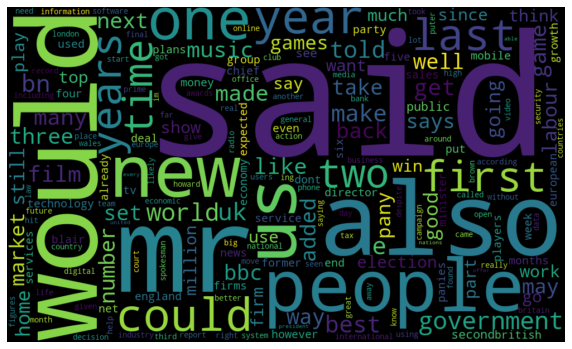

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Here, we can easily tell the big bold words aere the frequently used words.

# Lemmatization

Lemmatization converts the word into its root word, rather than just stripping the suffices. We can group similar words together. It will group similar words to one word. It will affect the number of frequent words because lemmatization will count all the similar words as one so it will increase the word frequency. For example:

In [18]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#establish the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\Asmita
[nltk_data]     Bamma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
# Lets apply it to our dataframe
df['clean_text'] = df.clean_text.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
df.head(10)

,id,news,type,word_cnt,char_cnt,stopwords,clean_text
0,0,UK economy facing 'major risks'\n \n The UK ma...,business,329,1996,112,uk economy facing major risk uk manufacturing ...
1,1,Aids and climate top Davos agenda\n \n Climate...,business,454,2727,161,aid climate top davos agenda climate change fi...
2,2,Asian quake hits European shares\n \n Shares i...,business,553,3444,171,asian quake hit european share share europe le...
3,3,India power shares jump on debut\n \n Shares i...,business,175,1038,55,india power share jump debut share india large...
4,4,Lacroix label bought by US firm\n \n Luxury go...,business,152,894,47,lacroix label bought u firm luxury good group ...
5,5,Insurance bosses plead guilty\n \n Another thr...,business,146,920,39,insurance boss plead guilty another three u in...
6,6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,257,1539,91,turkeyiran mobile deal risk turkey investment ...
7,7,Parmalat to return to stockmarket\n \n Parmala...,business,269,1675,100,parmalat return stockmarket parmalat italian p...
8,8,WorldCom director admits lying\n \n The former...,business,356,2085,129,director admits lying former chief financial o...
9,9,Ebbers denies WorldCom fraud\n \n Former World...,business,346,2067,125,ebbers denies fraud former chief bernie ebbers...


In [20]:
# We have run the code now we will see if it change the frequency of words.

freq = pd.Series(' '.join(df.clean_text).split()).value_counts().to_dict()

list(freq.items())[:10]

[('said', 7244),
 ('mr', 3045),
 ('year', 2851),
 ('would', 2554),
 ('also', 2141),
 ('people', 2029),
 ('new', 1942),
 ('u', 1933),
 ('one', 1803),
 ('could', 1505)]

We can clearly see that the number of counts are increased for most words, in fact, 'year' moved to top 3 position. That is defibitely a big difference.

# N-grams

First, we will create a list of individual words within our cleaned text which known as tokenization, resulting in a list of tokens.

In [21]:
#regenerate the tokens list
tokens = ' '.join(df.clean_text).split()

In [22]:
# creating the bigrams
ngrams_2 = nltk.bigrams(tokens)

# freq distribution for these
freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:20]

[(('last', 'year'), 498),
 (('said', 'mr'), 363),
 (('told', 'bbc'), 347),
 (('mr', 'blair'), 334),
 (('prime', 'minister'), 317),
 (('mr', 'brown'), 256),
 (('chief', 'executive'), 204),
 (('said', 'would'), 193),
 (('last', 'week'), 188),
 (('tony', 'blair'), 186),
 (('mobile', 'phone'), 182),
 (('bbc', 'news'), 178),
 (('general', 'election'), 174),
 (('new', 'york'), 167),
 (('bn', 'bn'), 162),
 (('six', 'nation'), 162),
 (('year', 'ago'), 160),
 (('mr', 'howard'), 159),
 (('liberal', 'democrat'), 156),
 (('number', 'one'), 146)]

Great, our results show the two words and their frequency in our clean_text data. Now, lets try generating trigrams and see the results.

In [23]:
# creating the trigrams
ngrams_3 = nltk.trigrams(tokens)

# freq distribution for these
freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:20]

[(('told', 'bbc', 'news'), 147),
 (('bbc', 'news', 'website'), 97),
 (('told', 'bbc', 'radio'), 76),
 (('leader', 'michael', 'howard'), 58),
 (('mr', 'blair', 'said'), 54),
 (('million', 'dollar', 'baby'), 52),
 (('radio', 'today', 'programme'), 49),
 (('told', 'bbc', 'sport'), 48),
 (('bbc', 'radio', 'today'), 47),
 (('tory', 'leader', 'michael'), 41),
 (('mr', 'howard', 'said'), 41),
 (('next', 'general', 'election'), 39),
 (('chancellor', 'gordon', 'brown'), 33),
 (('prime', 'minister', 'tony'), 32),
 (('leader', 'charles', 'kennedy'), 32),
 (('minister', 'tony', 'blair'), 32),
 (('digital', 'music', 'player'), 30),
 (('george', 'w', 'bush'), 29),
 (('two', 'year', 'ago'), 28),
 (('world', 'number', 'one'), 27)]

Now, here we have the combination of three words that come together frequently in our dataset. In fact, our results also show how many times these three words are written together.
Comparatively. trigrams make more sense than bigrams because three words help better to understand the context.

# Part of Speech (POS)

POS tagging will help in comparing the language structure present in our dataset. The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging.

In [24]:
 import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag

pos_tags = pos_tag(tokens)
pos_tags[:20]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asmita Bamma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('uk', 'JJ'),
 ('economy', 'NN'),
 ('facing', 'VBG'),
 ('major', 'JJ'),
 ('risk', 'NN'),
 ('uk', 'IN'),
 ('manufacturing', 'VBG'),
 ('sector', 'NN'),
 ('continue', 'VBP'),
 ('face', 'VBP'),
 ('serious', 'JJ'),
 ('challenge', 'NN'),
 ('next', 'IN'),
 ('two', 'CD'),
 ('year', 'NN'),
 ('british', 'JJ'),
 ('chamber', 'NN'),
 ('merce', 'NN'),
 ('bcc', 'NN'),
 ('said', 'VBD')]

We can also look at their frequency by creating a frequency distribution for the parts of speech in our dataset.

In [26]:
from collections import Counter

Counter([j for i,j in pos_tag(tokens)])


Counter({'JJ': 92161,
         'NN': 227649,
         'VBG': 19781,
         'IN': 7957,
         'VBP': 14186,
         'CD': 6674,
         'VBD': 34338,
         'NNS': 11844,
         'RBS': 132,
         'RB': 23215,
         'VBN': 12482,
         'VB': 10614,
         'JJS': 2398,
         'JJR': 1766,
         'NNP': 1018,
         'RBR': 1052,
         'WP$': 120,
         'MD': 5334,
         'VBZ': 3158,
         'DT': 811,
         'CC': 296,
         'FW': 912,
         'PRP': 254,
         'RP': 389,
         'WP': 69,
         'WRB': 45,
         'WDT': 60,
         'EX': 69,
         'POS': 2,
         'NNPS': 3,
         'PRP$': 15,
         'PDT': 4,
         'TO': 2,
         'UH': 10,
         'SYM': 4})

The highest we have here is JJ which is an adjective. It means the mostly used part of speech is adjective in our dataset.

# Topic Modeling with Gensim

First, we will obtain a list of lemmatized text

In [27]:
lem_ls = list(df.clean_text.apply(lambda x: list(x.split())))
print(lem_ls[:2])

[['uk', 'economy', 'facing', 'major', 'risk', 'uk', 'manufacturing', 'sector', 'continue', 'face', 'serious', 'challenge', 'next', 'two', 'year', 'british', 'chamber', 'merce', 'bcc', 'said', 'group', 'quarterly', 'survey', 'panies', 'found', 'export', 'picked', 'last', 'three', 'month', 'best', 'level', 'eight', 'year', 'rise', 'came', 'despite', 'exchange', 'rate', 'cited', 'major', 'concern', 'however', 'bcc', 'found', 'whole', 'uk', 'economy', 'still', 'faced', 'major', 'risk', 'warned', 'growth', 'set', 'slow', 'recently', 'forecast', 'economic', 'growth', 'slow', 'little', 'manufacturer', 'domestic', 'sale', 'growth', 'fell', 'back', 'slightly', 'quarter', 'survey', 'firm', 'found', 'employment', 'manufacturing', 'also', 'fell', 'job', 'expectation', 'lowest', 'level', 'year', 'despite', 'positive', 'news', 'export', 'sector', 'worrying', 'sign', 'manufacturing', 'bcc', 'said', 'result', 'reinforce', 'concern', 'sector', 'persistent', 'inability', 'sustain', 'recovery', 'outlook'

In [28]:
# Importing Gensim
import gensim
import gensim.corpora as corpora

We will need to construct a dictionary of our lemmatized terms and a term document frequency (TDF) for our dataset.

In [29]:
# Creating Dictionary
id2word = corpora.Dictionary(lem_ls)

# Term Document Frequency Corpus
#texts = lem_ls
corpus = [id2word.doc2bow(post) for post in lem_ls]

# Finding the optimal number of topics

In [30]:
# range of 2 to 15 topics

from gensim.models import CoherenceModel

scores = []
for i in range(2,15):
    print(f'Calcuting for {i} topics')
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    # compute the coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=lem_ls, 
                                         dictionary=id2word, 
                                         coherence='c_v')

    # retreive the coherence_scores
    coherence_lda = coherence_model_lda.get_coherence()
    
    scores.append((i,coherence_lda))

Calcuting for 2 topics
Calcuting for 3 topics
Calcuting for 4 topics
Calcuting for 5 topics
Calcuting for 6 topics
Calcuting for 7 topics
Calcuting for 8 topics
Calcuting for 9 topics
Calcuting for 10 topics
Calcuting for 11 topics
Calcuting for 12 topics
Calcuting for 13 topics
Calcuting for 14 topics


In [31]:
scores

[(2, 0.2988692813180129),
 (3, 0.3674916281070389),
 (4, 0.4138698090248009),
 (5, 0.44796995464685085),
 (6, 0.4185491915941198),
 (7, 0.4854333387472103),
 (8, 0.4709712855704953),
 (9, 0.43900260602281793),
 (10, 0.45101811690195037),
 (11, 0.4281668457729889),
 (12, 0.45166090475124404),
 (13, 0.4588482442969203),
 (14, 0.5067875899288795)]

Topic Number and Accuracy with Coherence Score

We have obtained different coherence scores with different number of topics from the results above. The highest score is 0.4829 which closest to 1. For, 14 number of topics, the score is the highest. So, the best choice here is 14.
Therefore, num_topics = 14 will give the best model performance.



In [32]:
bf_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=14, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Print the Topics

In [33]:
# Print the Keyword in the 14 topics
print(lda_model.print_topics())

[(0, '0.012*"said" + 0.010*"technology" + 0.010*"people" + 0.009*"year" + 0.008*"mobile" + 0.007*"service" + 0.007*"phone" + 0.007*"digital" + 0.007*"one" + 0.007*"new"'), (1, '0.022*"said" + 0.012*"people" + 0.008*"music" + 0.007*"could" + 0.006*"online" + 0.005*"also" + 0.005*"service" + 0.005*"consumer" + 0.005*"many" + 0.005*"u"'), (2, '0.013*"open" + 0.012*"said" + 0.010*"set" + 0.009*"win" + 0.009*"first" + 0.008*"match" + 0.007*"roddick" + 0.007*"australian" + 0.007*"year" + 0.007*"final"'), (3, '0.015*"said" + 0.009*"country" + 0.009*"would" + 0.008*"government" + 0.005*"year" + 0.005*"world" + 0.004*"also" + 0.004*"people" + 0.004*"new" + 0.004*"union"'), (4, '0.010*"said" + 0.009*"patent" + 0.008*"test" + 0.008*"drug" + 0.008*"athens" + 0.007*"also" + 0.007*"athletics" + 0.006*"kenteris" + 0.006*"iaaf" + 0.006*"greek"'), (5, '0.013*"england" + 0.010*"game" + 0.009*"wale" + 0.008*"ireland" + 0.008*"side" + 0.007*"win" + 0.007*"first" + 0.007*"six" + 0.007*"player" + 0.006*"rug

The result is showing all the 14 topics starting from 0 to 13. The words shown in each topic have the highest frequency within that topic. For example, in topic 13, words such as said, apple, file, system, music, legal, game, u, movie, and court are mostly repeated. And the number next to them represent their frequency count from highest to the lowest. This means, 'game' has the highest count i.e. 0.040 for topic 13.

# Graph the Topics

In [34]:

import pyLDAvis
import pyLDAvis.gensim_models # Retrieved from https://stackoverflow.com/questions/66759852/no-module-named-pyldavis
import pickle

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(bf_lda_model, corpus, id2word)
pyLDAvis.save_html(LDAvis_prepared,'topic_model_viz.html')

C:\Users\Asmita Bamma\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


The results from the graph shows us that our topic model is not a perfect topic model because the bubbles are clearly overlapping, and their sizes are significantly not equal to each other.Especially, topics 1, 4, 8, 9, and 11 are overlapping hugely. There is no distance between them which means there are less similarities between the topics and more differences. We can also determine that 'said' is the most frequent word in the entire corpus(dataset). We know this by looking at the length of blue bars when no topic is selected. 
Overall, we can improve this model by tuning. It might help to get better graphical results.